In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Packages loaded


In [4]:
dir_path = "C:/Users/iris168/DATA_MERGE_NEW_rename/"
img = cv2.imread(dir_path+'cells (1).jpg')
data= [np.array(img[:,:,0].reshape(-1),dtype = 'float32')]
for i in range (2,1044):
    cell_img2_ = cv2.imread(dir_path+'cells ('+str(i)+').jpg')
    if (cell_img2_.shape == (50,50,3)):
        img2= np.array(cell_img2_[:,:,0].reshape(-1),dtype = 'float32')
        data_ = np.append(data, [img2], axis=0 )
        data = data_
    print(data.shape)

(2, 2500)
(3, 2500)
(4, 2500)
(5, 2500)
(6, 2500)
(7, 2500)
(8, 2500)
(9, 2500)
(10, 2500)
(11, 2500)
(12, 2500)
(13, 2500)
(14, 2500)
(15, 2500)
(16, 2500)
(16, 2500)
(17, 2500)
(18, 2500)
(19, 2500)
(20, 2500)
(21, 2500)
(22, 2500)
(23, 2500)
(24, 2500)
(25, 2500)
(26, 2500)
(27, 2500)
(28, 2500)
(28, 2500)
(29, 2500)
(30, 2500)
(31, 2500)
(32, 2500)
(33, 2500)
(34, 2500)
(35, 2500)
(36, 2500)
(37, 2500)
(38, 2500)
(39, 2500)
(40, 2500)
(41, 2500)
(42, 2500)
(43, 2500)
(44, 2500)
(45, 2500)
(46, 2500)
(47, 2500)
(48, 2500)
(49, 2500)
(50, 2500)
(51, 2500)
(52, 2500)
(53, 2500)
(54, 2500)
(55, 2500)
(56, 2500)
(57, 2500)
(58, 2500)
(59, 2500)
(60, 2500)
(61, 2500)
(62, 2500)
(63, 2500)
(64, 2500)
(65, 2500)
(66, 2500)
(67, 2500)
(68, 2500)
(69, 2500)
(70, 2500)
(71, 2500)
(72, 2500)
(73, 2500)
(74, 2500)
(75, 2500)
(76, 2500)
(77, 2500)
(78, 2500)
(79, 2500)
(80, 2500)
(81, 2500)
(82, 2500)
(82, 2500)
(83, 2500)
(84, 2500)
(85, 2500)
(86, 2500)
(87, 2500)
(88, 2500)
(89, 2500)
(90, 25

(702, 2500)
(703, 2500)
(704, 2500)
(705, 2500)
(706, 2500)
(707, 2500)
(708, 2500)
(709, 2500)
(710, 2500)
(711, 2500)
(712, 2500)
(713, 2500)
(714, 2500)
(715, 2500)
(716, 2500)
(717, 2500)
(718, 2500)
(719, 2500)
(720, 2500)
(721, 2500)
(722, 2500)
(723, 2500)
(724, 2500)
(724, 2500)
(725, 2500)
(726, 2500)
(727, 2500)
(728, 2500)
(729, 2500)
(730, 2500)
(731, 2500)
(732, 2500)
(733, 2500)
(734, 2500)
(735, 2500)
(736, 2500)
(737, 2500)
(738, 2500)
(739, 2500)
(740, 2500)
(741, 2500)
(742, 2500)
(743, 2500)
(744, 2500)
(745, 2500)
(746, 2500)
(747, 2500)
(748, 2500)
(749, 2500)
(750, 2500)
(751, 2500)
(752, 2500)
(753, 2500)
(754, 2500)
(755, 2500)
(756, 2500)
(757, 2500)
(758, 2500)
(759, 2500)
(760, 2500)
(761, 2500)
(762, 2500)
(763, 2500)
(764, 2500)
(765, 2500)
(766, 2500)
(767, 2500)
(767, 2500)
(768, 2500)
(769, 2500)
(770, 2500)
(771, 2500)
(772, 2500)
(773, 2500)
(774, 2500)
(775, 2500)
(776, 2500)
(777, 2500)
(778, 2500)
(779, 2500)
(780, 2500)
(781, 2500)
(782, 2500)
(783

AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
def rand_batch(data,batch_size):
    np.random.shuffle(data)
    return data[0:batch_size]

In [6]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding = 'SAME')

def deconv2d(x, W, output_shape):
    return tf.nn.conv2d_transpose(x, W, output_shape, strides = [1, 2, 2, 1], padding = 'SAME')
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

In [13]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape = [None, 2500])
x_origin = tf.reshape(x, [-1, 50, 50, 1])

W_e_conv1 = weight_variable([5, 5, 1, 16], "w_e_conv1")
b_e_conv1 = bias_variable([16], "b_e_conv1")
h_e_conv1 = tf.nn.relu(tf.add(conv2d(x_origin, W_e_conv1), b_e_conv1))

W_e_conv2 = weight_variable([5, 5, 16, 32], "w_e_conv2")
b_e_conv2 = bias_variable([32], "b_e_conv2")
h_e_conv2 = tf.nn.relu(tf.add(conv2d(h_e_conv1, W_e_conv2), b_e_conv2))

code_layer = h_e_conv2


W_d_conv1 = weight_variable([5, 5, 16, 32], "w_d_conv1")
b_d_conv1 = bias_variable([1], "b_d_conv1")
output_shape_d_conv1 = tf.stack([tf.shape(x)[0], 25, 25, 16])
h_d_conv1 = tf.nn.relu(deconv2d(h_e_conv2, W_d_conv1, output_shape_d_conv1))

W_d_conv2 = weight_variable([5, 5, 1, 16], "w_d_conv2")
b_d_conv2 = bias_variable([16], "b_d_conv2")
output_shape_d_conv2 = tf.stack([tf.shape(x)[0], 50, 50, 1])
h_d_conv2 = tf.nn.relu(deconv2d(h_d_conv1, W_d_conv2, output_shape_d_conv2))

x_reconstruct = h_d_conv2
print("reconstruct layer shape : %s" % x_reconstruct.get_shape())

reconstruct layer shape : (?, 50, 50, 1)


In [14]:
print("x_origin",x_origin)
print("W_e_conv1",W_e_conv1)
print("h_e_conv1",h_e_conv1)
print("W_e_conv2",W_e_conv2)
print("h_e_conv2",h_e_conv2)
print("code layer shape : %s" % h_e_conv2.get_shape())
print("W_d_conv1",W_d_conv1)
print("h_d_conv1",h_d_conv1)
print("W_d_conv2",W_d_conv2)
print("h_d_conv2",h_d_conv2)

x_origin Tensor("Reshape:0", shape=(?, 50, 50, 1), dtype=float32)
W_e_conv1 <tf.Variable 'Variable:0' shape=(5, 5, 1, 16) dtype=float32_ref>
h_e_conv1 Tensor("Relu:0", shape=(?, 25, 25, 16), dtype=float32)
W_e_conv2 <tf.Variable 'Variable_2:0' shape=(5, 5, 16, 32) dtype=float32_ref>
h_e_conv2 Tensor("Relu_1:0", shape=(?, 13, 13, 32), dtype=float32)
code layer shape : (?, 13, 13, 32)
W_d_conv1 <tf.Variable 'Variable_4:0' shape=(5, 5, 16, 32) dtype=float32_ref>
h_d_conv1 Tensor("Relu_2:0", shape=(?, 25, 25, 16), dtype=float32)
W_d_conv2 <tf.Variable 'Variable_6:0' shape=(5, 5, 1, 16) dtype=float32_ref>
h_d_conv2 Tensor("Relu_3:0", shape=(?, 50, 50, 1), dtype=float32)


In [15]:
w_list = [W_e_conv1,W_e_conv2,W_d_conv1,W_d_conv2]
org_loss = tf.reduce_mean(tf.pow(x_reconstruct - x_origin, 2))
regularizer = tf.reduce_sum([tf.reduce_sum(
                             tf.pow(w,2)/(1+tf.pow(w,2))) for w in w_list]) \
                            /tf.reduce_sum(
                             [tf.size(w,out_type=tf.float32) for w in w_list])
loss = org_loss+regularizer
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(loss)
init_op = tf.global_variables_initializer()

In [22]:
n_split = 900
data_train, data_test = data[:n_split], data[n_split:]

In [23]:
data_train.shape

(900, 2500)

In [28]:
train_loss =[]
batch_size =30
sess = tf.InteractiveSession()
sess.run(init_op)
for i in range(30000):
    batch = rand_batch(data_train,batch_size)
    if i%100 == 0:
        print("step %d, loss %g"%(i, loss.eval(feed_dict={x:batch/255})))
        train_loss.append(loss.eval(feed_dict={x:batch}))
    optimizer.run(feed_dict={x:batch/255})
    
print("final loss %g" % loss.eval(feed_dict={x:data_test/255}))

step 0, loss 0.235532
step 100, loss 0.239464
step 200, loss 0.0555589
step 300, loss 0.0137678
step 400, loss 0.0114647
step 500, loss 0.0109202
step 600, loss 0.0107184
step 700, loss 0.00946573
step 800, loss 0.00990622
step 900, loss 0.00927814
step 1000, loss 0.0122403
step 1100, loss 0.00912904
step 1200, loss 0.0109029
step 1300, loss 0.0114169
step 1400, loss 0.0148521
step 1500, loss 0.0117858
step 1600, loss 0.0106206
step 1700, loss 0.0149958
step 1800, loss 0.00761857
step 1900, loss 0.00635171
step 2000, loss 0.00843352
step 2100, loss 0.0149043
step 2200, loss 0.0110226
step 2300, loss 0.00333534
step 2400, loss 0.00637864
step 2500, loss 0.0121328
step 2600, loss 0.00670366
step 2700, loss 0.00812409
step 2800, loss 0.00878175
step 2900, loss 0.00822423
step 3000, loss 0.00782564
step 3100, loss 0.00948313
step 3200, loss 0.00702182
step 3300, loss 0.00502203
step 3400, loss 0.00465151
step 3500, loss 0.00767945
step 3600, loss 0.00864231
step 3700, loss 0.00862118
step 

final loss 0.00754306


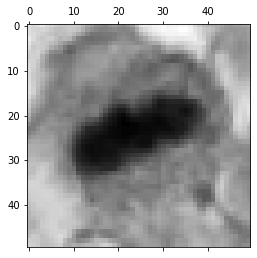

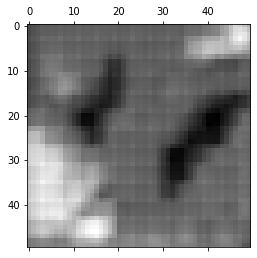

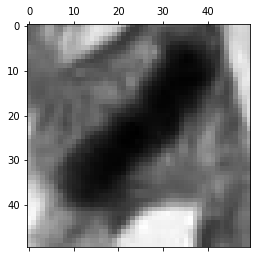

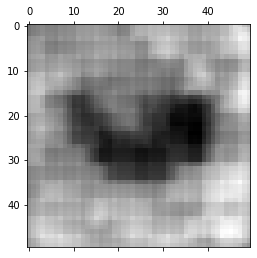

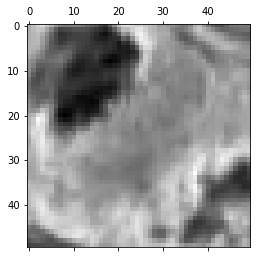

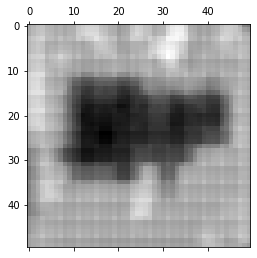

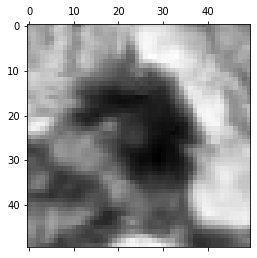

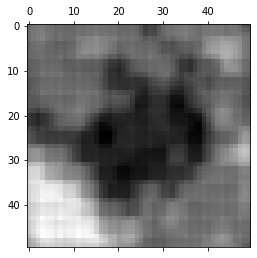

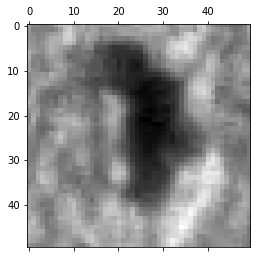

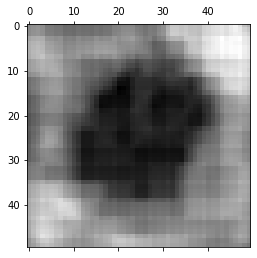

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = x_reconstruct.eval(feed_dict = {x:data[100:200]/255})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:]*255, (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))

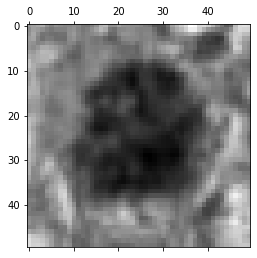

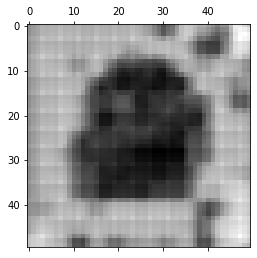

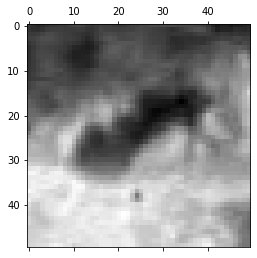

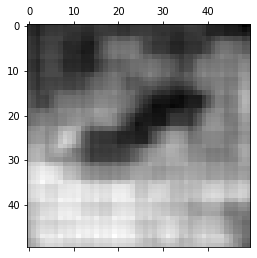

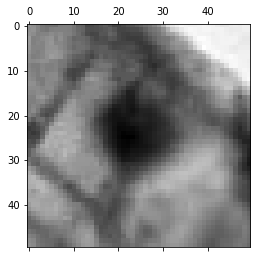

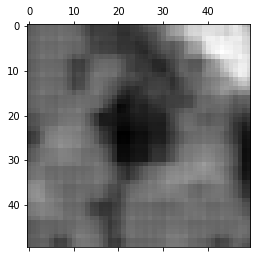

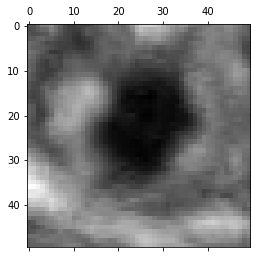

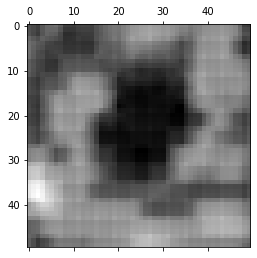

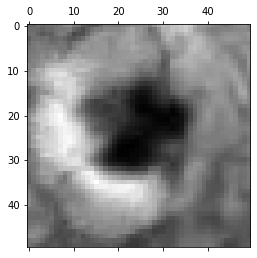

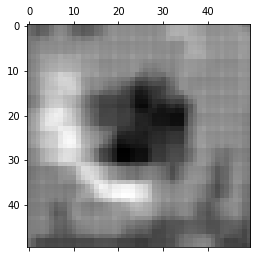

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = x_reconstruct.eval(feed_dict = {x:data_test/255})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data_test[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:]*255, (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))

In [30]:
def plot_n_reconstruct(origin_img, reconstruct_img, n = 10):

    plt.figure(figsize=(2 * 10, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(origin_img[i].reshape(50, 50))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstruct_img[i].reshape(50, 50))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [47]:
import math
def plot_conv_layer(layer, image, num_filters):
    output = sess.run(layer, feed_dict = {x: [image]})
    
    num_grids = int(math.ceil(math.sqrt(num_filters)))
    
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i < num_grids * num_grids:
            img = output[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='gray')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

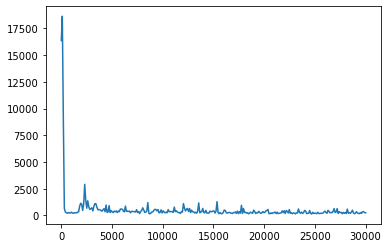

In [29]:
x = np.linspace(0,30000,300)
plt.plot(x,train_loss)

In [48]:
image1 = data_test[0].reshape(50, 50)
plot_conv_layer(code_layer, image1, 16)

TypeError: unhashable type: 'numpy.ndarray'

In [42]:
data_test[0]

array([145., 149., 153., ..., 170., 170., 169.], dtype=float32)

In [44]:
len(data_test[0].reshape(50, 50))

50

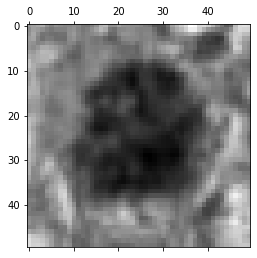

In [45]:
plt.matshow(data_test[0].reshape(50, 50), cmap='gray')

In [49]:
    output = sess.run(code_layer, feed_dict = {x: data_test[0].reshape(50, 50)})
    
    num_grids = int(math.ceil(math.sqrt(num_filters)))
    
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i < num_grids * num_grids:
            img = output[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='gray')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

TypeError: unhashable type: 'numpy.ndarray'